In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [4]:
classifier=Sequential()

In [5]:
classifier.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(16,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [6]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("Flowers_Dataset/train",
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory("Flowers_Dataset/test",
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 2920 images belonging to 5 classes.
Found 730 images belonging to 5 classes.


In [8]:
history = classifier.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // 32)

Epoch 1/10
91/91 [==============================] - 95s 1s/step - loss: 1.3727 - accuracy: 0.3999 - val_loss: 1.1738 - val_accuracy: 0.5270
Epoch 2/10
91/91 [==============================] - 88s 972ms/step - loss: 1.0182 - accuracy: 0.6035 - val_loss: 0.9989 - val_accuracy: 0.6278
Epoch 3/10
91/91 [==============================] - 89s 982ms/step - loss: 0.7855 - accuracy: 0.7119 - val_loss: 1.0961 - val_accuracy: 0.5724
Epoch 4/10
91/91 [==============================] - 91s 999ms/step - loss: 0.5675 - accuracy: 0.7995 - val_loss: 1.2766 - val_accuracy: 0.5852
Epoch 5/10
91/91 [==============================] - 89s 974ms/step - loss: 0.3125 - accuracy: 0.9003 - val_loss: 1.4456 - val_accuracy: 0.5838
Epoch 6/10
91/91 [==============================] - 89s 982ms/step - loss: 0.1591 - accuracy: 0.9539 - val_loss: 1.6295 - val_accuracy: 0.5625
Epoch 7/10
91/91 [==============================] - 87s 960ms/step - loss: 0.0757 - accuracy: 0.9816 - val_loss: 2.2421 - val_accuracy: 0.5639
Ep

In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 128)              

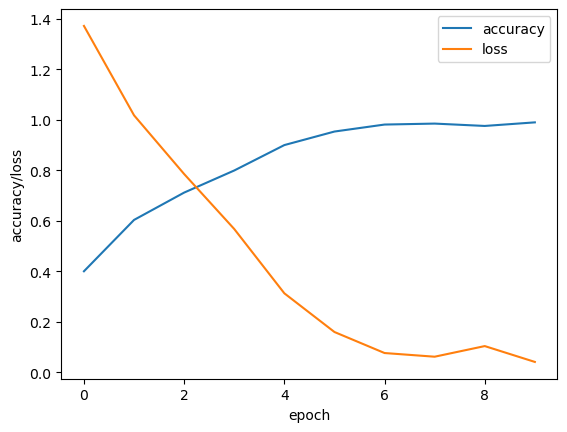

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['loss'], label="loss")
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend()
plt.show()

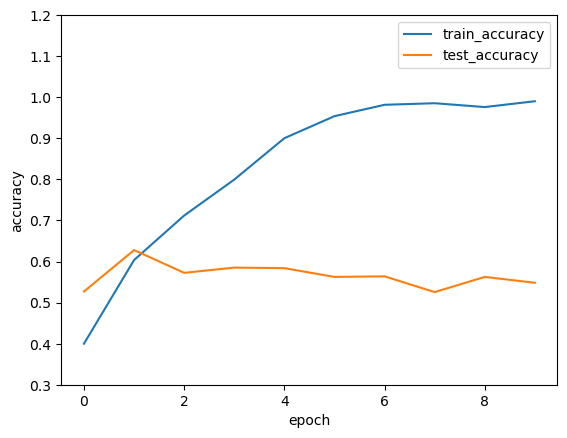

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="test_accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0.3, 1.2)
plt.legend()
plt.show()

#### It can be seen above that model is highly overfitted
#### Now trying Augmentation

In [12]:
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   horizontal_flip=True)
train_generator_aug = train_datagen.flow_from_directory("Flowers_Dataset/train",
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2920 images belonging to 5 classes.


In [32]:
X_train, y_train = next(train_generator_aug)
X_test, y_test = next(test_generator)

In [13]:
history_aug = classifier.fit(train_generator_aug,
                    steps_per_epoch=train_generator_aug.samples // 32,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // 32)

Epoch 1/10
91/91 [==============================] - 99s 1s/step - loss: 0.0365 - accuracy: 0.9920 - val_loss: 2.6832 - val_accuracy: 0.5753
Epoch 2/10
91/91 [==============================] - 97s 1s/step - loss: 0.0304 - accuracy: 0.9924 - val_loss: 2.4383 - val_accuracy: 0.5426
Epoch 3/10
91/91 [==============================] - 101s 1s/step - loss: 0.0167 - accuracy: 0.9979 - val_loss: 2.8434 - val_accuracy: 0.5554
Epoch 4/10
91/91 [==============================] - 95s 1s/step - loss: 0.0074 - accuracy: 0.9993 - val_loss: 2.9868 - val_accuracy: 0.5568
Epoch 5/10
91/91 [==============================] - 96s 1s/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 3.1034 - val_accuracy: 0.5582
Epoch 6/10
91/91 [==============================] - 92s 1s/step - loss: 0.0053 - accuracy: 0.9997 - val_loss: 3.1474 - val_accuracy: 0.5582
Epoch 7/10
91/91 [==============================] - 96s 1s/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 3.2727 - val_accuracy: 0.5568
Epoch 8/10
91/91 [=

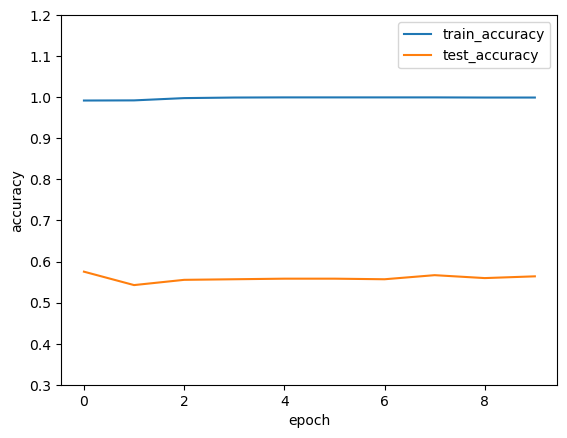

In [21]:
plt.plot(history_aug.history['accuracy'], label="train_accuracy")
plt.plot(history_aug.history['val_accuracy'], label="test_accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0.3, 1.2)
plt.legend()
plt.show()

In [24]:
import numpy as np
y_pred = classifier.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

23/23 [==============================] - 5s 236ms/step


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[21 22 29 41 33]
 [33 29 19 30 35]
 [26 22 19 34 45]
 [30 20 20 42 34]
 [27 33 30 17 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.14      0.15       146
           1       0.23      0.20      0.21       146
           2       0.16      0.13      0.14       146
           3       0.26      0.29      0.27       146
           4       0.21      0.27      0.23       146

    accuracy                           0.21       730
   macro avg       0.20      0.21      0.20       730
weighted avg       0.20      0.21      0.20       730

